In [1]:
import numpy as np
import torch
import torch.nn as nn
from torch.nn import ReLU
import torchvision
import torchvision.datasets as datasets
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

from utils import *

#Exercise 3 
## Loss Functions

### Implement Mean Squared Error Loss, and Cross Entropy loss in the cells below.

Recall the formula for calculating mean squared error from lecture:

$$MSE = \frac{\sum\limits_{i = 1}^{n} (y_i - \hat{y_i})^2}{n}$$


In [33]:
class MSE(nn.Module):
  def __call__(self, y_true, y_pred):
    out = None
    # ================================= #
    #          Your code here           #
    # ================================= #
    out = pow((y_pred-y_true), 2)
    out = torch.mean(out)
    #out=out.item()/(y_pred.numel())
    # ================================= #

    return out

In [34]:
torch.manual_seed(0)

# Initialize MSE loss
layer = MSE()

# Create some random data
y_true, y_pred = torch.randn(10), torch.randn(10)
print("True data", y_true)
print("Predicted data", y_pred)

# Perform a forward pass
out = layer(y_true, y_pred)

print("Result", out)

True data tensor([ 1.5410, -0.2934, -2.1788,  0.5684, -1.0845, -1.3986,  0.4033,  0.8380,
        -0.7193, -0.4033])
Predicted data tensor([-0.5966,  0.1820, -0.8567,  1.1006, -1.0712,  0.1227, -0.5663,  0.3731,
        -0.8920, -1.5091])
Result tensor(1.1550)


In [35]:
check_loss(MSE)

Error:  0.0
You got it! Please wait for further instructions.


#Exercise 4

Hint: The gradient is stored in self.matrix.grad and self.bias.grad

In [54]:
class MatrixLayer(nn.Module):
  def __str__(self):
    return f"MatrixLayer({self.input_size}, {self.output_size})"
    
  def __init__(self, input_size, output_size):
    super(MatrixLayer, self).__init__()
    self.input_size = input_size
    self.output_size = output_size
    self.matrix = nn.Parameter(torch.randn(input_size, output_size))
    self.bias = nn.Parameter(torch.randn(output_size))

  def forward(self, x):
    out = None
    out = torch.matmul(x, self.matrix) + self.bias
    return out

  def update(self, learning_rate):
    with torch.no_grad():
      # ================================= #
      #          Your code here           #
      # ================================= #
      self.matrix -= learning_rate*self.matrix.grad
      self.bias -= learning_rate*self.bias.grad
      # ================================= #
      self.matrix.grad = None
      self.bias.grad = None

In [55]:
check_grad(MatrixLayer)

You got it! Please wait for further instructions.


#Exercise 5

## We are going to download the MNIST dataset.

In [56]:
num_epochs = 10
batch_size = 8
learning_rate = 1e-3

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5), (0.5))])

mnist_trainset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
mnist_testset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

trainloader = torch.utils.data.DataLoader(mnist_trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)
testloader = torch.utils.data.DataLoader(mnist_testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)
classes = [str(i) for i in range(10)]

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


## Visualize a sample image from dataset

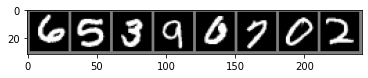

    6     5     3     9     0     7     0     2


In [57]:
# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(batch_size)))

## Create a model that has a matrix layer with 784 inputs and 128 outputs, relu, followed by another matrix layer with 128 inputs and 10 outputs.

Hint: Put your layers in the variable `layers`

In [66]:
torch.manual_seed(0)
# ================================= #
#          Your code here           #
# ================================= #
layers = [MatrixLayer(784,128), ReLU(), MatrixLayer(128, 10)]
# ================================= #
model = Model(layers)
criterion = nn.CrossEntropyLoss()
print(model)

Model(
	MatrixLayer(784, 128)
	ReLU()
	MatrixLayer(128, 10)
)


## Run training loop
Hint: 
1) pass data into model

2) compute loss on model output and labels

3) backprop through loss 

In [67]:
for epoch in range(num_epochs):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # Extract data from the loader and reshape it into the correct shape
        inputs, labels = data
        inputs = inputs.reshape(-1, 784)

        # Do a forward pass through the model and get the outputs
        outputs = model(inputs)

        # Calculate the loss
        loss = criterion(outputs, labels)

        # Perform gradient descent
        loss.backward()
        model.update()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f"[Epoch: {epoch + 1}, Iteration: {i + 1}] loss: {running_loss/2000:0.3f}")
            running_loss = 0.0

print('Finished Training')

[Epoch: 1, Iteration: 2000] loss: 37.360
[Epoch: 1, Iteration: 4000] loss: 14.215
[Epoch: 1, Iteration: 6000] loss: 10.012
[Epoch: 2, Iteration: 2000] loss: 6.982
[Epoch: 2, Iteration: 4000] loss: 6.261
[Epoch: 2, Iteration: 6000] loss: 5.398
[Epoch: 3, Iteration: 2000] loss: 4.371
[Epoch: 3, Iteration: 4000] loss: 4.162
[Epoch: 3, Iteration: 6000] loss: 3.793
[Epoch: 4, Iteration: 2000] loss: 3.061
[Epoch: 4, Iteration: 4000] loss: 3.056
[Epoch: 4, Iteration: 6000] loss: 2.857
[Epoch: 5, Iteration: 2000] loss: 2.542
[Epoch: 5, Iteration: 4000] loss: 2.241
[Epoch: 5, Iteration: 6000] loss: 2.197
[Epoch: 6, Iteration: 2000] loss: 1.990
[Epoch: 6, Iteration: 4000] loss: 1.924
[Epoch: 6, Iteration: 6000] loss: 1.758
[Epoch: 7, Iteration: 2000] loss: 1.614
[Epoch: 7, Iteration: 4000] loss: 1.554
[Epoch: 7, Iteration: 6000] loss: 1.476
[Epoch: 8, Iteration: 2000] loss: 1.289
[Epoch: 8, Iteration: 4000] loss: 1.331
[Epoch: 8, Iteration: 6000] loss: 1.235
[Epoch: 9, Iteration: 2000] loss: 1.1

## Visualize a sample of data

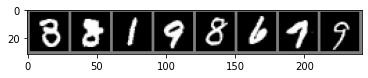

    8     8     1     9     8     6     9     9


In [68]:
imshow(torchvision.utils.make_grid(inputs.reshape(-1, 1, 28, 28)))
_, predicted = torch.max(outputs.data, 1)
print(' '.join('%5s' % classes[predicted[j]] for j in range(batch_size)))

## Visualize model performance

Accuracy of the network on the 10000 test images: 85 %


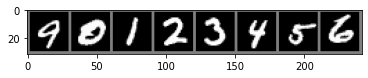

    9     0     1     2     3     4     5     2


In [70]:
evaluate(model, testloader)